# [프로젝트] 울산 공공 와이파이 분석하기
---

# 1. 프로젝트 기획 배경
---


현대사회의 필수품인 스마트폰으로 많은 정보나 활동하기 위해 와이파이는 필수입니다. 하지만 울산광역시 내의 위치, 시설마다 공공 와이파이의 설치율의 편차가 큰 것 같다고 생각하였습니다.

그래서 데이터 분석으로 확인해보려 합니다.

## 프로젝트 목표
---
- 울산광역시 공공 와이파이 데이터를 분석하여 유의미한 정보 도출할 수 있다.
- 탐색적 데이터 분석을 수행하기 위한 데이터 정제, 특성 엔지니어링, 시각화 방법 학습할 수 있다.

# 2. 프로젝트 목차
---

1. **데이터 수집:** 울산광역시 공공 와이파이 정보 데이터를 불러오고 DataFrame 구조를 확인<br>
    1-1 라이브러리 임포트 하기<br>
    1-2 데이터 불러오기<br><br>

2. **데이터 정제:** 데이터 확인 후 형 변환 및 이상치 데이터 처리<br>
    2.1 중복값 확인<br>
    2.2 불필요한 데이터 삭제<br>
    2.3 null 데이터 채우기<br><br>
 
3. **데이터 시각화:** 각 변수별로 추가적인 정제 과정을 거치고 시각화를 총해 데이터 특성 파악<br>
    3.1 군/구별 와이파이 설치갯수<br>
    3.2 시설별 와이파이 설치갯수<br>
    3.3 년월별 와이파이 설치갯수<br>


## 1. 데이터 수집하기
---

### 1.1 라이브러리 임포트 하기
---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 경고 무시
pd.set_option('mode.chained_assignment',  None)

### 1.2 데이터 불러오기
---
자료출처 : https://www.localdata.go.kr/lif/lifeCtacDataView.do

In [2]:
wifi = pd.read_csv("./울산무료와이파이.csv", encoding='euc-kr')

In [3]:
wifi.tail()

,번호,설치장소명,설치장소상세,설치시도명,설치시군구명,설치시설구분,서비스제공사명,와이파이SSID,설치연월,소재지도로명주소,소재지지번주소,관리기관명,관리기관전화번호,WGS84위도,WGS84경도,데이터기준일자
500,501,전하경로당,경로당 내,울산광역시,동구,서민·복지시설,LGU+,Public Wifi FREE,2020-02,울산광역시 동구 진성12길 130,NaN,울산광역시 동구,052-209-3140,35.511236,129.427574,2022-11-16
501,502,산성경로당,경로당 내,울산광역시,동구,서민·복지시설,LGU+,Public Wifi FREE,2020-02,울산광역시 동구 진성5길 56-2,NaN,울산광역시 동구,052-209-3140,35.508081,129.426058,2022-11-16
502,503,화정주공경로당,경로당 내,울산광역시,동구,서민·복지시설,LGU+,Public Wifi FREE,2020-02,울산광역시 동구 월봉10길 14,NaN,울산광역시 동구,052-209-3140,35.494542,129.419422,2022-11-16
503,504,월봉경로당,경로당 내,울산광역시,동구,서민·복지시설,LGU+,Public Wifi FREE,2020-02,울산광역시 동구 월봉로 78-1,NaN,울산광역시 동구,052-209-3140,35.492819,129.426083,2022-11-16
504,505,쇠평어린이공원,공원 내,울산광역시,동구,지역문화시설,LGU+,Public Wifi FREE,2020-02,울산광역시 동구 동부동 87,NaN,울산광역시 동구,052-209-3140,35.552577,129.434637,2022-11-16


## 2. 데이터 정제하기
---

### 2.1 중복값 확인하기
---

In [4]:
wifi[wifi.duplicated(keep=False)]

,번호,설치장소명,설치장소상세,설치시도명,설치시군구명,설치시설구분,서비스제공사명,와이파이SSID,설치연월,소재지도로명주소,소재지지번주소,관리기관명,관리기관전화번호,WGS84위도,WGS84경도,데이터기준일자


### 2.2 불필요한 데이터 삭제
---

In [5]:
wifi = wifi.drop(['번호','설치장소상세','설치시도명','서비스제공사명','와이파이SSID','소재지지번주소','관리기관명','관리기관전화번호','WGS84위도','WGS84경도','데이터기준일자'], axis=1)

In [6]:
wifi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 5 columns):
설치장소명       505 non-null object
설치시군구명      505 non-null object
설치시설구분      505 non-null object
설치연월        261 non-null object
소재지도로명주소    479 non-null object
dtypes: object(5)
memory usage: 19.8+ KB


### 2.3 null 데이터 채우기
---

In [7]:
wifi.isnull().sum()

설치장소명         0
설치시군구명        0
설치시설구분        0
설치연월        244
소재지도로명주소     26
dtype: int64

In [8]:
wifi['설치연월'] = wifi['설치연월'].fillna('0')
wifi['소재지도로명주소'] = wifi['소재지도로명주소'].fillna("0")

In [9]:
wifi.isnull().sum()

설치장소명       0
설치시군구명      0
설치시설구분      0
설치연월        0
소재지도로명주소    0
dtype: int64

## 3. 데이터 시각화하기
---

### 3.1 군/구별 와이파이 설치갯수
---

In [10]:
wifi['설치시군구명'].sort_values()

62    남구
36    남구
37    남구
38    남구
39    남구
40    남구
41    남구
43    남구
44    남구
45    남구
46    남구
47    남구
48    남구
49    남구
50    남구
35    남구
51    남구
53    남구
54    남구
55    남구
56    남구
57    남구
58    남구
59    남구
60    남구
61    남구
63    남구
98    남구
97    남구
96    남구
      ..
90    중구
91    중구
87    중구
93    중구
94    중구
65    중구
92    중구
88    중구
66    중구
68    중구
86    중구
85    중구
84    중구
83    중구
82    중구
81    중구
80    중구
79    중구
67    중구
78    중구
89    중구
75    중구
74    중구
73    중구
72    중구
71    중구
70    중구
69    중구
77    중구
76    중구
Name: 설치시군구명, Length: 505, dtype: object

In [11]:
wifi['location'] = wifi['설치시군구명']
wifi_location = wifi.groupby('location').count()["설치시군구명"].sort_values()
wifi_location

location
중구      31
남구      50
울주군     63
동구     153
북구     208
Name: 설치시군구명, dtype: int64

In [12]:
fm._rebuild()
fm.get_fontconfig_fonts()

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = './NanumGothic.ttf'

font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

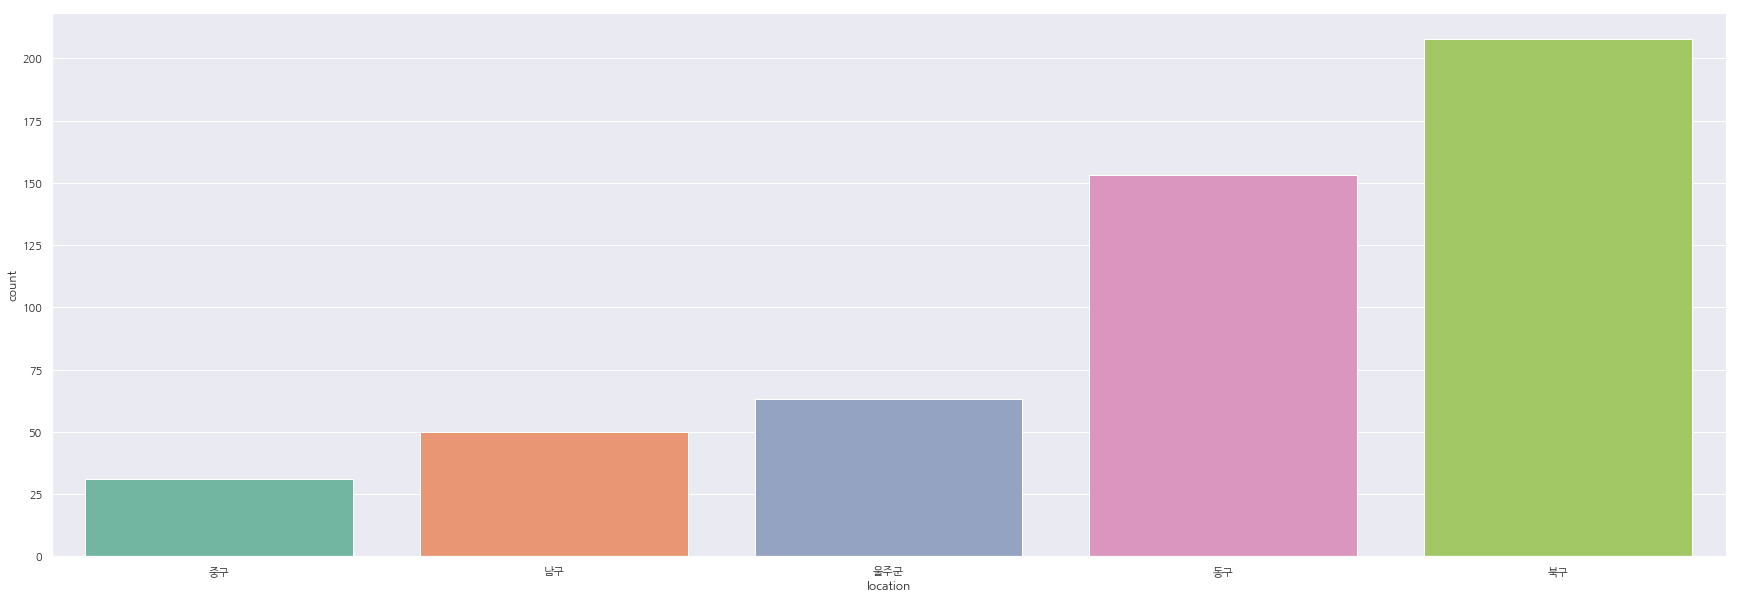

In [13]:
plt.figure(figsize=(30,10))

sns.set(font='NanumGothic', 
        rc={"axes.unicode_minus":False}, #한글 폰트 사용시 마이너스 폰트 깨짐 해결
        style='darkgrid')

ax = sns.countplot(x='location', data=wifi, palette="Set2", order=wifi_location.index)
plt.show()

### 3.2 시설별 와이파이 설치갯수
---

In [14]:
wifi['설치시설구분'].sort_values()

0       관공서
114     관공서
115     관공서
122     관공서
123     관공서
124     관공서
125     관공서
126     관공서
127     관공서
128     관공서
130     관공서
131     관공서
132     관공서
133     관공서
134     관공서
135     관공서
113     관공서
112     관공서
111     관공서
110     관공서
86      관공서
87      관공서
88      관공서
89      관공서
90      관공서
91      관공서
92      관공서
136     관공서
93      관공서
99      관공서
       ... 
177    편의시설
232    편의시설
178    편의시설
192    편의시설
199    편의시설
200    편의시설
201    편의시설
202    편의시설
204    편의시설
205    편의시설
345    편의시설
206    편의시설
207    편의시설
208    편의시설
234    편의시설
209    편의시설
222    편의시설
223    편의시설
176    편의시설
226    편의시설
324    편의시설
229    편의시설
453    편의시설
455    편의시설
315    편의시설
466    편의시설
467    편의시설
470    편의시설
220    편의시설
224    편의시설
Name: 설치시설구분, Length: 505, dtype: object

In [15]:
wifi['facility'] = wifi['설치시설구분']
wifi_facility = wifi.groupby('facility').count()["설치시설구분"].sort_values()
wifi_facility

facility
교육시설         5
기타          26
편의시설        46
서민·복지시설     52
관광          74
교통시설        86
지역문화시설      93
관공서        123
Name: 설치시설구분, dtype: int64

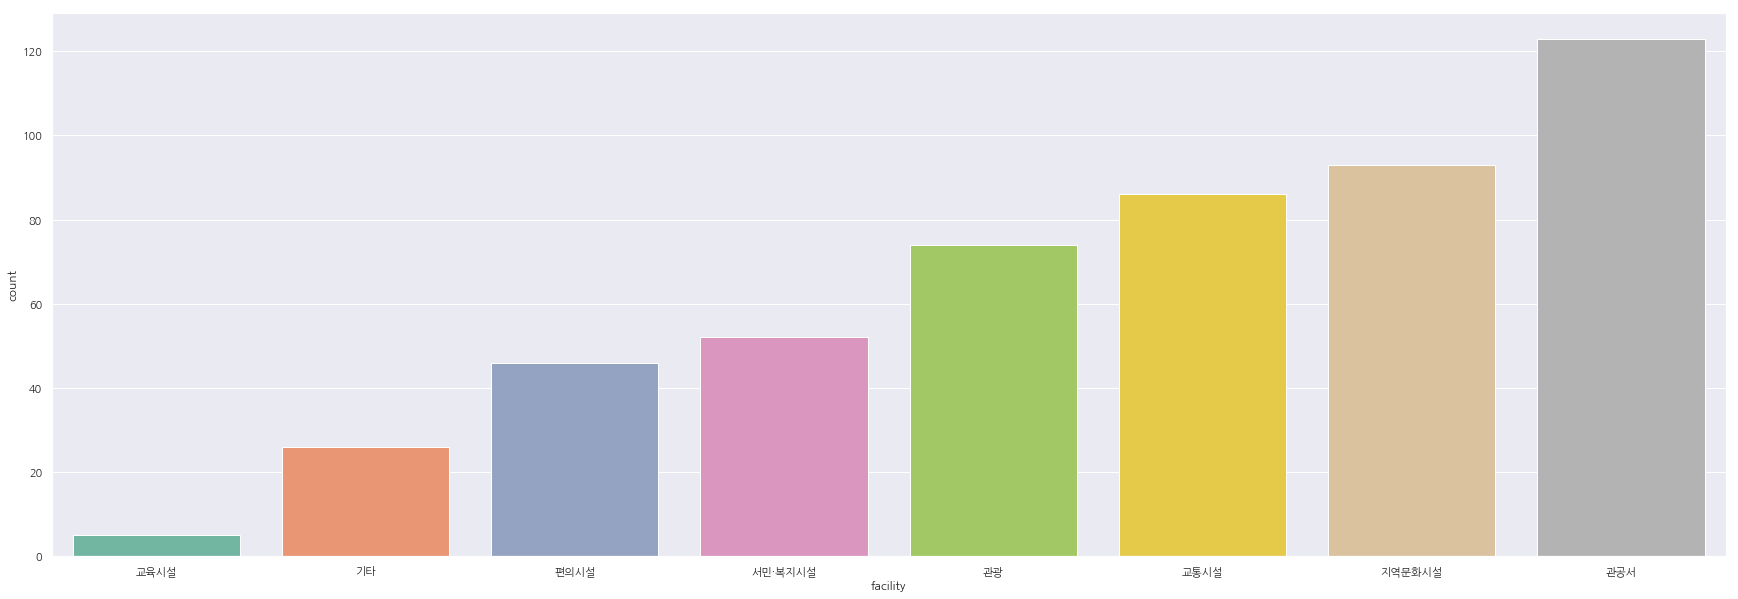

In [16]:
plt.figure(figsize=(30,10))

sns.set(font='NanumGothic', 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

ax = sns.countplot(x='facility', data=wifi, palette="Set2", order=wifi_facility.index)
plt.show()

### 3.3 년월별 와이파이 설치갯수
---

In [17]:
wifi['설치연월'].sort_values()

252          0
175          0
176          0
177          0
178          0
179          0
180          0
181          0
182          0
183          0
184          0
185          0
186          0
187          0
188          0
174          0
189          0
191          0
192          0
193          0
194          0
195          0
196          0
197          0
198          0
199          0
200          0
201          0
202          0
203          0
        ...   
113    2020-05
114    2020-05
115    2020-05
116    2020-05
110    2020-05
89     2020-05
86     2020-05
87     2020-05
85     2020-05
84     2020-05
83     2020-05
82     2020-05
81     2020-05
80     2020-05
79     2020-05
88     2020-05
117    2020-06
446    2020-11
445    2020-11
444    2020-11
413    2020-11
441    2020-11
437    2020-11
439    2020-11
438    2020-11
436    2020-11
442    2020-11
443    2020-11
440    2020-11
414    2021-12
Name: 설치연월, Length: 505, dtype: object

In [18]:
mask = wifi['설치연월'].isin(['0'])
wifi_del = wifi[~mask]
wifi_del['설치연월'].sort_values()

447    2011-10
448    2011-10
449    2011-10
64     2013-01
450    2013-12
451    2013-12
452    2013-12
453    2013-12
454    2013-12
65     2014-01
465    2014-12
464    2014-12
463    2014-12
461    2014-12
462    2014-12
459    2014-12
458    2014-12
457    2014-12
460    2014-12
455    2014-12
466    2015-10
467    2015-10
472    2016-07
471    2016-12
476    2017-01
67     2017-01
66     2017-01
68     2017-01
473    2017-02
474    2017-06
        ...   
84     2020-05
83     2020-05
82     2020-05
81     2020-05
80     2020-05
79     2020-05
95     2020-05
96     2020-05
113    2020-05
98     2020-05
111    2020-05
112    2020-05
114    2020-05
115    2020-05
116    2020-05
97     2020-05
117    2020-06
441    2020-11
413    2020-11
440    2020-11
439    2020-11
438    2020-11
444    2020-11
436    2020-11
445    2020-11
446    2020-11
443    2020-11
437    2020-11
442    2020-11
414    2021-12
Name: 설치연월, Length: 261, dtype: object

In [19]:
wifi_del["설치연월"]=wifi_del["설치연월"].apply(str)

In [20]:
year_month = []

for data in wifi_del['설치연월']:
    year = data.split("-")[0]
    month = data.split("-")[1]
    year_month.append(f'{year}년 {month}월')

In [21]:
wifi_del['year_month'] = year_month

In [22]:
wifi_del.groupby("year_month").count()['설치연월']

year_month
2011년 10월      3
2013년 01월      1
2013년 12월      5
2014년 01월      1
2014년 12월     10
2015년 10월      2
2016년 07월      1
2016년 12월      1
2017년 01월      4
2017년 02월      1
2017년 06월      1
2017년 07월      1
2017년 10월      1
2018년 01월      1
2018년 05월     13
2018년 07월      2
2018년 11월      4
2019년 01월     18
2019년 02월      1
2019년 03월      6
2019년 04월     13
2019년 05월      1
2019년 06월      1
2019년 07월      1
2019년 08월      1
2019년 09월     10
2019년 11월      8
2019년 12월      2
2020년 02월    102
2020년 04월      4
2020년 05월     27
2020년 06월      1
2020년 11월     12
2021년 12월      1
Name: 설치연월, dtype: int64

In [23]:
wifi_year_month = pd.DataFrame(wifi_del.groupby("year_month").count()["설치연월"])

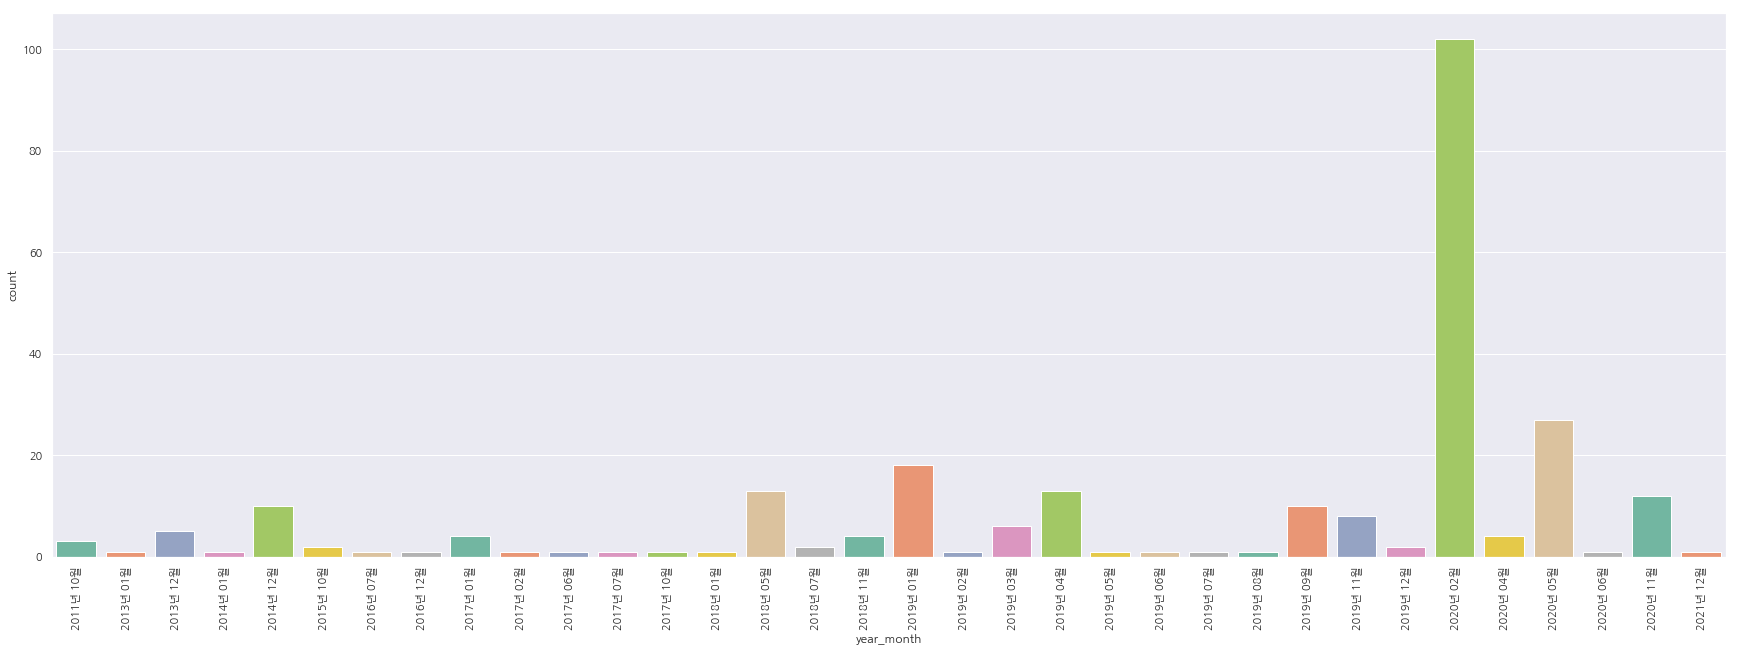

In [24]:
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

plt.figure(figsize=(30,10))

sns.set(font='NanumGothic', 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

ax = sns.countplot(x='year_month', data=wifi_del, palette="Set2", order=wifi_year_month.index)
plt.xticks(rotation=-270)
plt.show()

# 3. 프로젝트 후기
----

- 직접 프로젝트를 하나 만듦으로써 데이터 분석에 대해 많은 것을 배울 수 있었습니다.

- 파일 업로드 문제, 폰트 깨짐 등 자잘한 오류가 발생하였습니다. 하지만 제 생각과 구글링을 통해 여러 번 시도하다 보니 이러한 오류들을 해결을 할 수 있었습니다. 이를 통해 오류가 발생한다고 하더라도 스스로 해결해 나갈 수 있다는 자신감을 얻었습니다. 